In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
df = load_diabetes()

In [4]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
# input data
x = df.data

In [7]:
# output
y = df.target

In [10]:
x.shape

(442, 10)

In [11]:
y.shape

(442,)

In [12]:
# cross validation

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

In [14]:
# scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(clip = True)

In [17]:
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [18]:
x_train_scaled.shape, x_test_scaled.shape

((331, 10), (111, 10))

In [19]:
# model building k = 5

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
knn_reg = KNeighborsRegressor(n_neighbors= 5)

In [22]:
knn_reg.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [23]:
# evaluate

In [24]:
y_pred = knn_reg.predict(x_test_scaled)

In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

mean_absolute_error(y_test, y_pred)

48.93153153153153

In [26]:
r2_score(y_test, y_pred)

0.17859498412040287

In [27]:
# best k

In [28]:
MSE = []

for k in range(1, 31):
    knn_reg = KNeighborsRegressor(n_neighbors= k)
    knn_reg.fit(x_train_scaled, y_train)
    y_pred = knn_reg.predict(x_test_scaled)
    mse = mean_absolute_error(y_test, y_pred)
    MSE.append(mse)

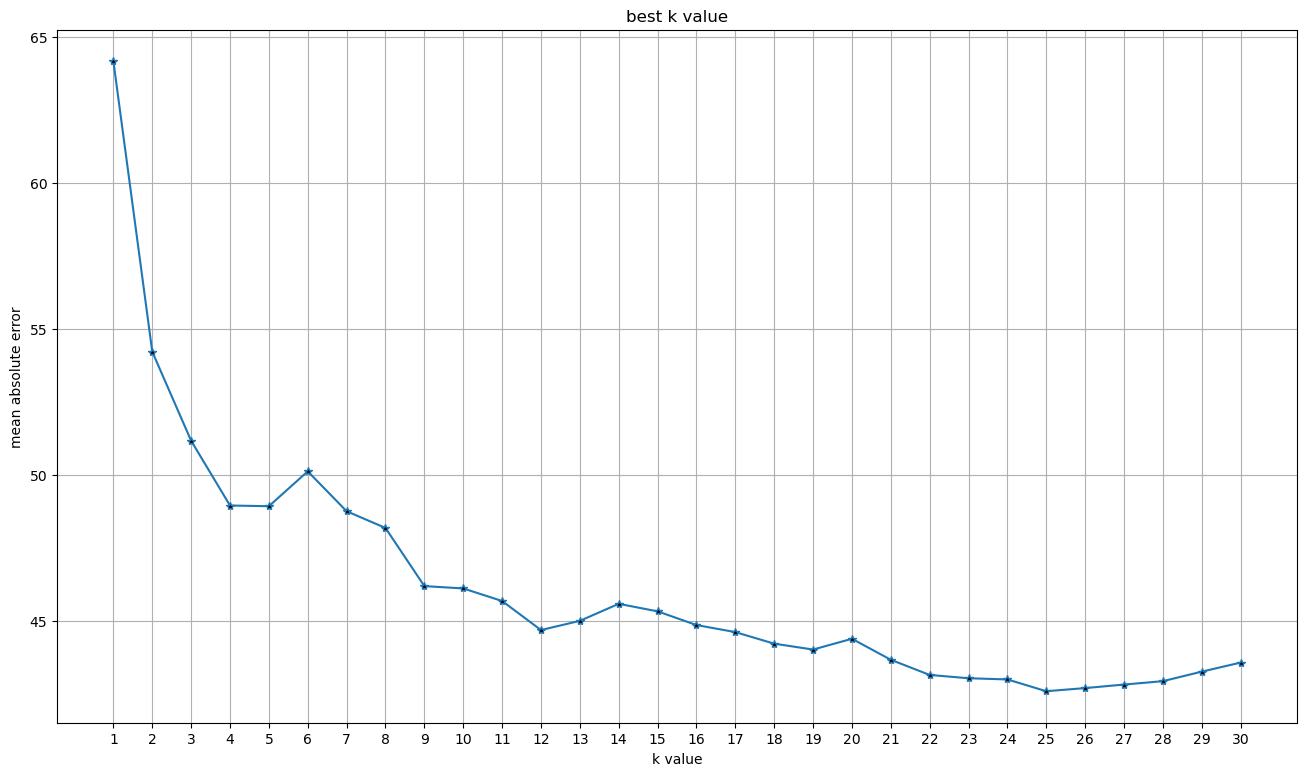

In [29]:
plt.figure(figsize=(16,9))

plt.title("best k value")
plt.xlabel("k value")
plt.ylabel("mean absolute error")

plt.xticks(range(1, 31, 1))

plt.plot(range(1, 31), MSE, marker = "*", mfc = 'black')
plt.grid();

In [31]:
r2 = []

for k in range(1, 31):
    knn_reg = KNeighborsRegressor(n_neighbors= k)
    knn_reg.fit(x_train_scaled, y_train)
    y_pred = knn_reg.predict(x_test_scaled)
    mse = r2_score(y_test, y_pred)
    r2.append(mse)

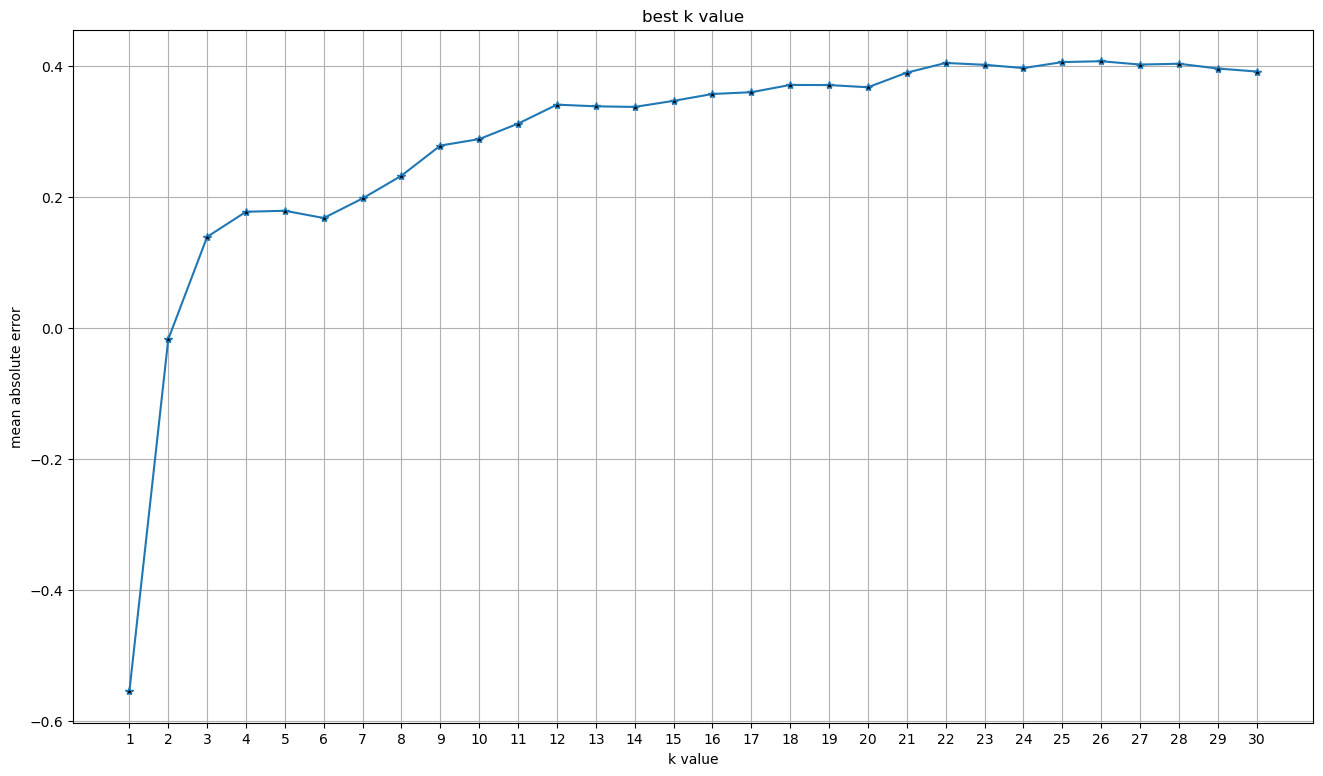

In [32]:
plt.figure(figsize=(16,9))

plt.title("best k value")
plt.xlabel("k value")
plt.ylabel("mean absolute error")

plt.xticks(range(1, 31, 1))

plt.plot(range(1, 31), r2, marker = "*", mfc = 'black')
plt.grid();

In [34]:
df.data[:2, :]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405]])

In [35]:
new = [0.04,  0.15068012,  0.02169621,  0.04187239, -0.0342235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.02990749, -0.01764613]

In [36]:
df.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [38]:
pred_data = pd.DataFrame([new], columns= df.feature_names)

In [39]:
pred_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.04,0.15068,0.021696,0.041872,-0.034223,-0.034821,-0.043401,-0.002592,0.029907,-0.017646


In [40]:
# k = 25
knn_reg = KNeighborsRegressor(n_neighbors= 25)
knn_reg.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=25)

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
knn_reg.predict(pred_data)

array([127.32])